In [1]:
import pandas as pd
df = pd.read_csv('/content/covid19.csv', index_col='date',
                  parse_dates=['date'])
df.tail()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-04-18,5453.0,2354.0,1399.0,4636.0,19345.0,4459.0,521.0,535.0,5031.0,571.0,23227.0,546.0,3613.0,687.0,20043.0,1511.0,1368.0,1890.0,38671.0,15498.0
2020-04-19,5683.0,2462.0,1563.0,4636.0,19744.0,4586.0,559.0,582.0,5118.0,610.0,23660.0,650.0,3697.0,714.0,20453.0,1540.0,1393.0,2017.0,40664.0,16095.0
2020-04-20,5828.0,2587.0,1725.0,4636.0,20292.0,4862.0,592.0,590.0,5209.0,687.0,24114.0,686.0,3764.0,735.0,20852.0,1580.0,1429.0,2140.0,42097.0,16550.0
2020-04-21,5998.0,2741.0,1908.0,4636.0,20829.0,5033.0,645.0,616.0,5297.0,730.0,24648.0,712.0,3929.0,762.0,21282.0,1765.0,1478.0,2259.0,44447.0,17378.0
2020-04-22,6262.0,2906.0,2075.0,4636.0,21373.0,5279.0,681.0,635.0,5391.0,769.0,25085.0,857.0,4068.0,785.0,21717.0,1937.0,1509.0,2376.0,46628.0,18151.0


In [2]:
s = df.loc['2020-03-29']
s

Belgium             431.0
Brazil              136.0
Canada               64.0
China              3304.0
France             2611.0
Germany             533.0
India                27.0
Indonesia           114.0
Iran               2640.0
Ireland              46.0
Italy             10779.0
Mexico               16.0
Netherlands         772.0
Portugal            119.0
Spain              6803.0
Sweden              110.0
Switzerland         300.0
Turkey              131.0
USA                2566.0
United Kingdom     1231.0
Name: 2020-03-29 00:00:00, dtype: float64

<BarContainer object of 20 artists>

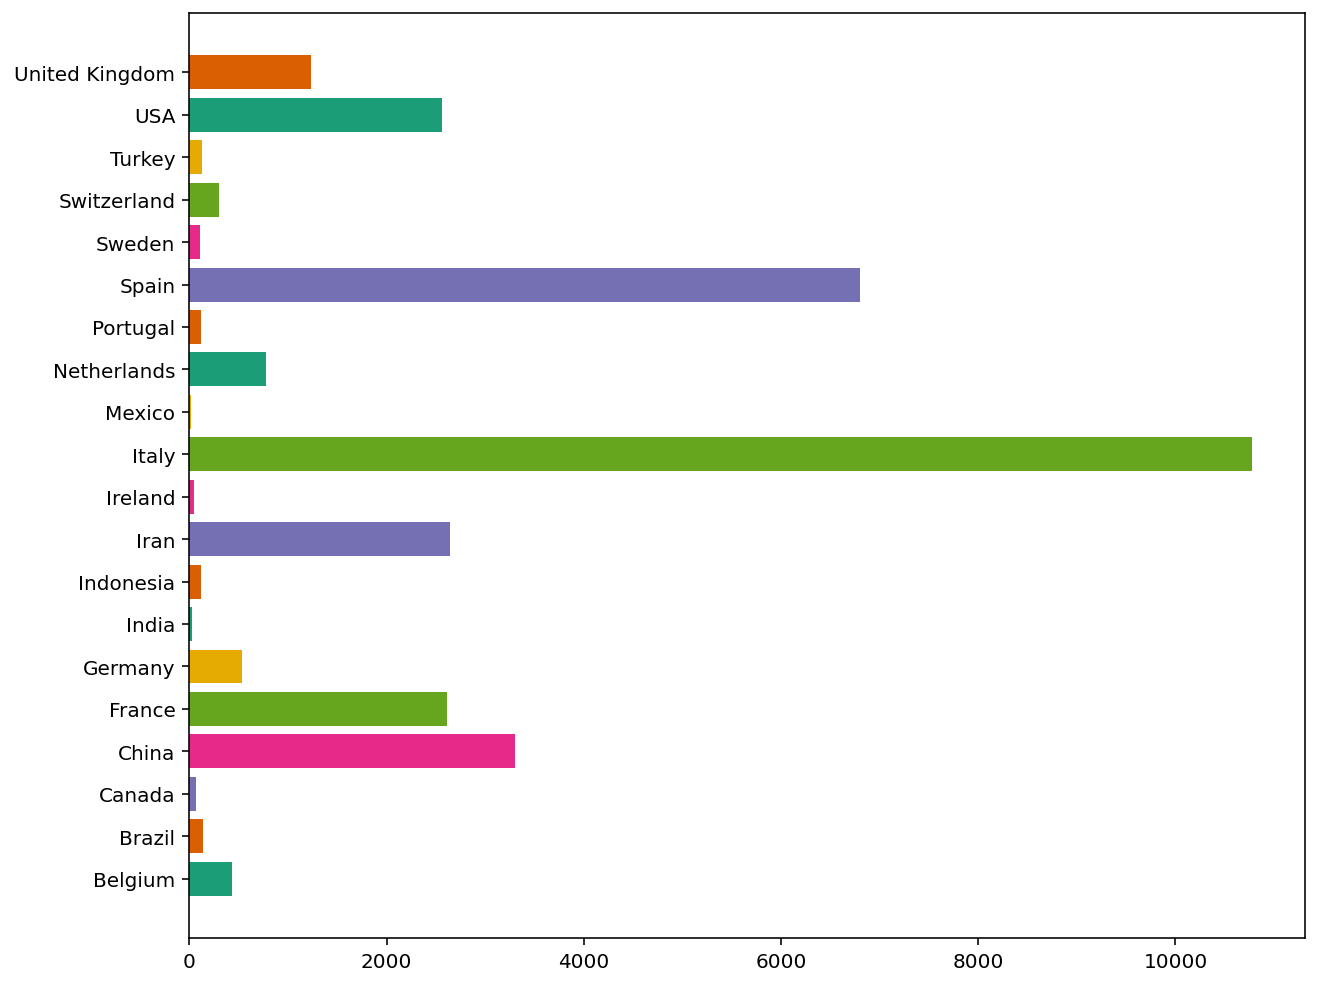

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors)

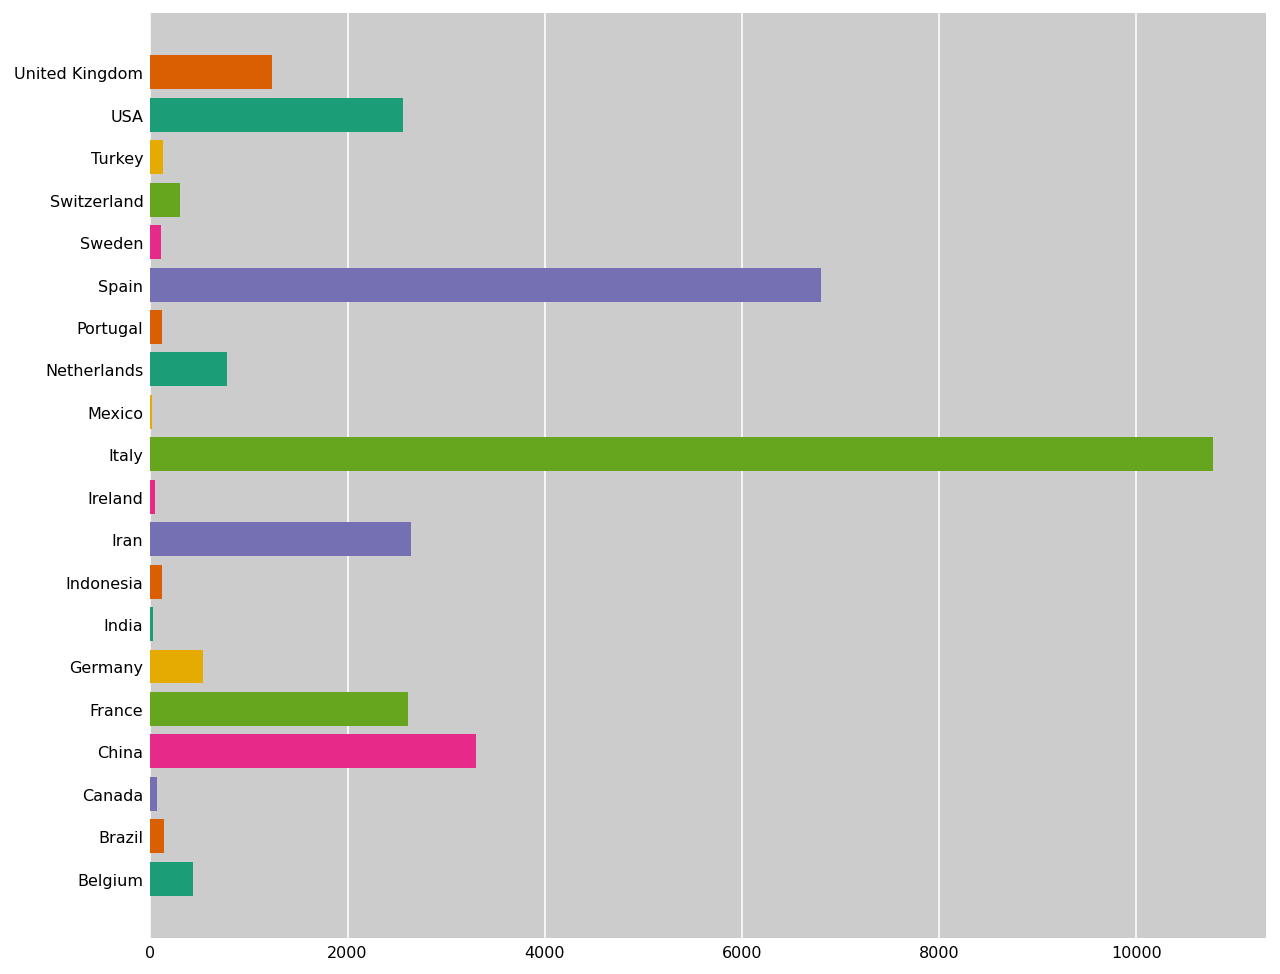

In [4]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

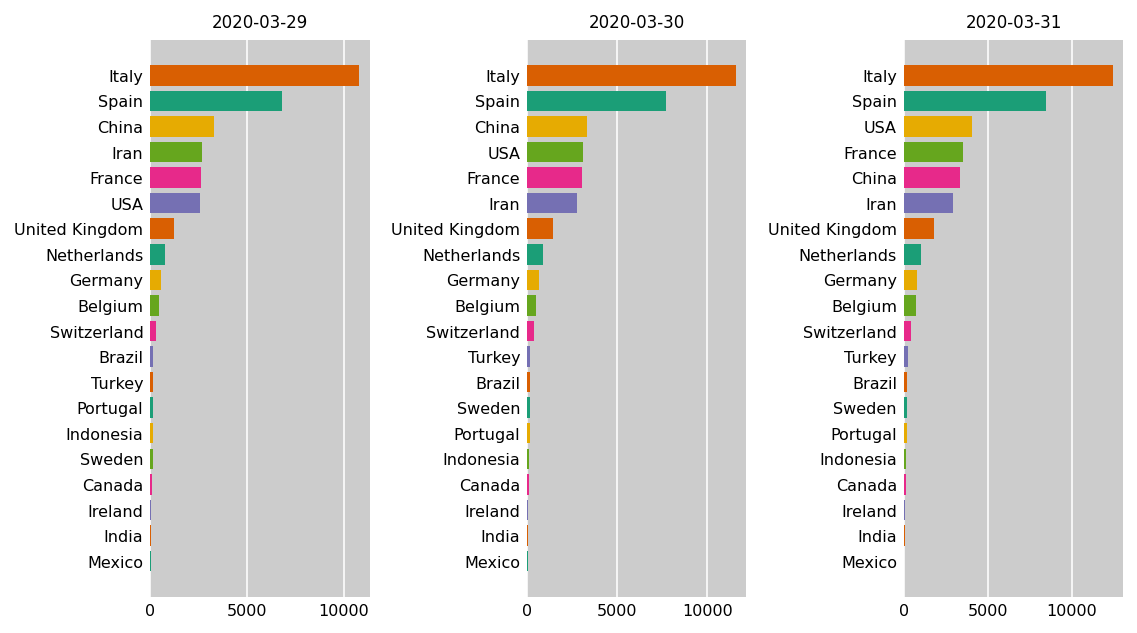

In [5]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(8, 4.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [6]:
df.loc['2020-03-29'].rank(method='first')

Belgium           11.0
Brazil             9.0
Canada             4.0
China             18.0
France            16.0
Germany           12.0
India              2.0
Indonesia          6.0
Iran              17.0
Ireland            3.0
Italy             20.0
Mexico             1.0
Netherlands       13.0
Portugal           7.0
Spain             19.0
Sweden             5.0
Switzerland       10.0
Turkey             8.0
USA               15.0
United Kingdom    14.0
Name: 2020-03-29 00:00:00, dtype: float64

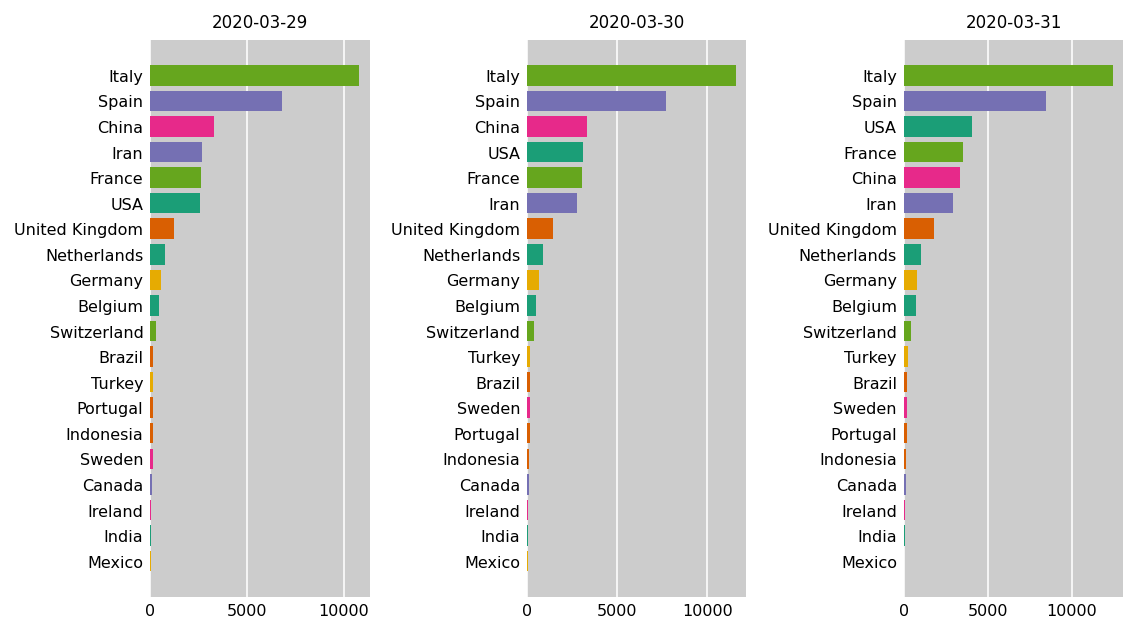

In [7]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(8, 4.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first').values
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [8]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [9]:
df2 = df2.reset_index()
df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [10]:
df2.index = df2.index * 5
df2

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
10,2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [11]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

,date,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
0,2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('date')
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_expanded = df_expanded.interpolate()
df_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29,447.4,140.6,67.2,3304.8,2694.8,555.4,28.0,115.6,2663.4,47.6,10941.4,16.8,790.6,123.2,6985.6,117.2,311.8,138.4,2675.2,1267.0
2020-03-29,463.8,145.2,70.4,3305.6,2778.6,577.8,29.0,117.2,2686.8,49.2,11103.8,17.6,809.2,127.4,7168.2,124.4,323.6,145.8,2784.4,1303.0
2020-03-29,480.2,149.8,73.6,3306.4,2862.4,600.2,30.0,118.8,2710.2,50.8,11266.2,18.4,827.8,131.6,7350.8,131.6,335.4,153.2,2893.6,1339.0
2020-03-29,496.6,154.4,76.8,3307.2,2946.2,622.6,31.0,120.4,2733.6,52.4,11428.6,19.2,846.4,135.8,7533.4,138.8,347.2,160.6,3002.8,1375.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30,551.4,167.4,84.2,3308.2,3130.4,671.0,32.6,124.8,2785.2,57.4,11758.4,21.6,900.0,144.0,7865.6,152.8,373.8,177.2,3297.4,1487.4
2020-03-30,589.8,175.8,88.4,3308.4,3230.8,697.0,33.2,127.6,2813.4,60.8,11925.8,23.2,935.0,148.0,8015.2,159.6,388.6,186.4,3482.8,1563.8
2020-03-30,628.2,184.2,92.6,3308.6,3331.2,723.0,33.8,130.4,2841.6,64.2,12093.2,24.8,970.0,152.0,8164.8,166.4,403.4,195.6,3668.2,1640.2


In [15]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29,11.0,8.8,4.0,18.0,16.0,12.0,2.0,5.8,16.6,3.0,20.0,1.0,13.0,6.8,19.0,5.4,10.0,8.2,15.4,14.0
2020-03-29,11.0,8.6,4.0,18.0,16.0,12.0,2.0,5.6,16.2,3.0,20.0,1.0,13.0,6.6,19.0,5.8,10.0,8.4,15.8,14.0
2020-03-29,11.0,8.4,4.0,18.0,16.0,12.0,2.0,5.4,15.8,3.0,20.0,1.0,13.0,6.4,19.0,6.2,10.0,8.6,16.2,14.0
2020-03-29,11.0,8.2,4.0,18.0,16.0,12.0,2.0,5.2,15.4,3.0,20.0,1.0,13.0,6.2,19.0,6.6,10.0,8.8,16.6,14.0
2020-03-30,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0
2020-03-30,11.0,8.0,4.0,17.6,16.2,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.2,14.0
2020-03-30,11.0,8.0,4.0,17.2,16.4,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.4,14.0
2020-03-30,11.0,8.0,4.0,16.8,16.6,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.6,14.0


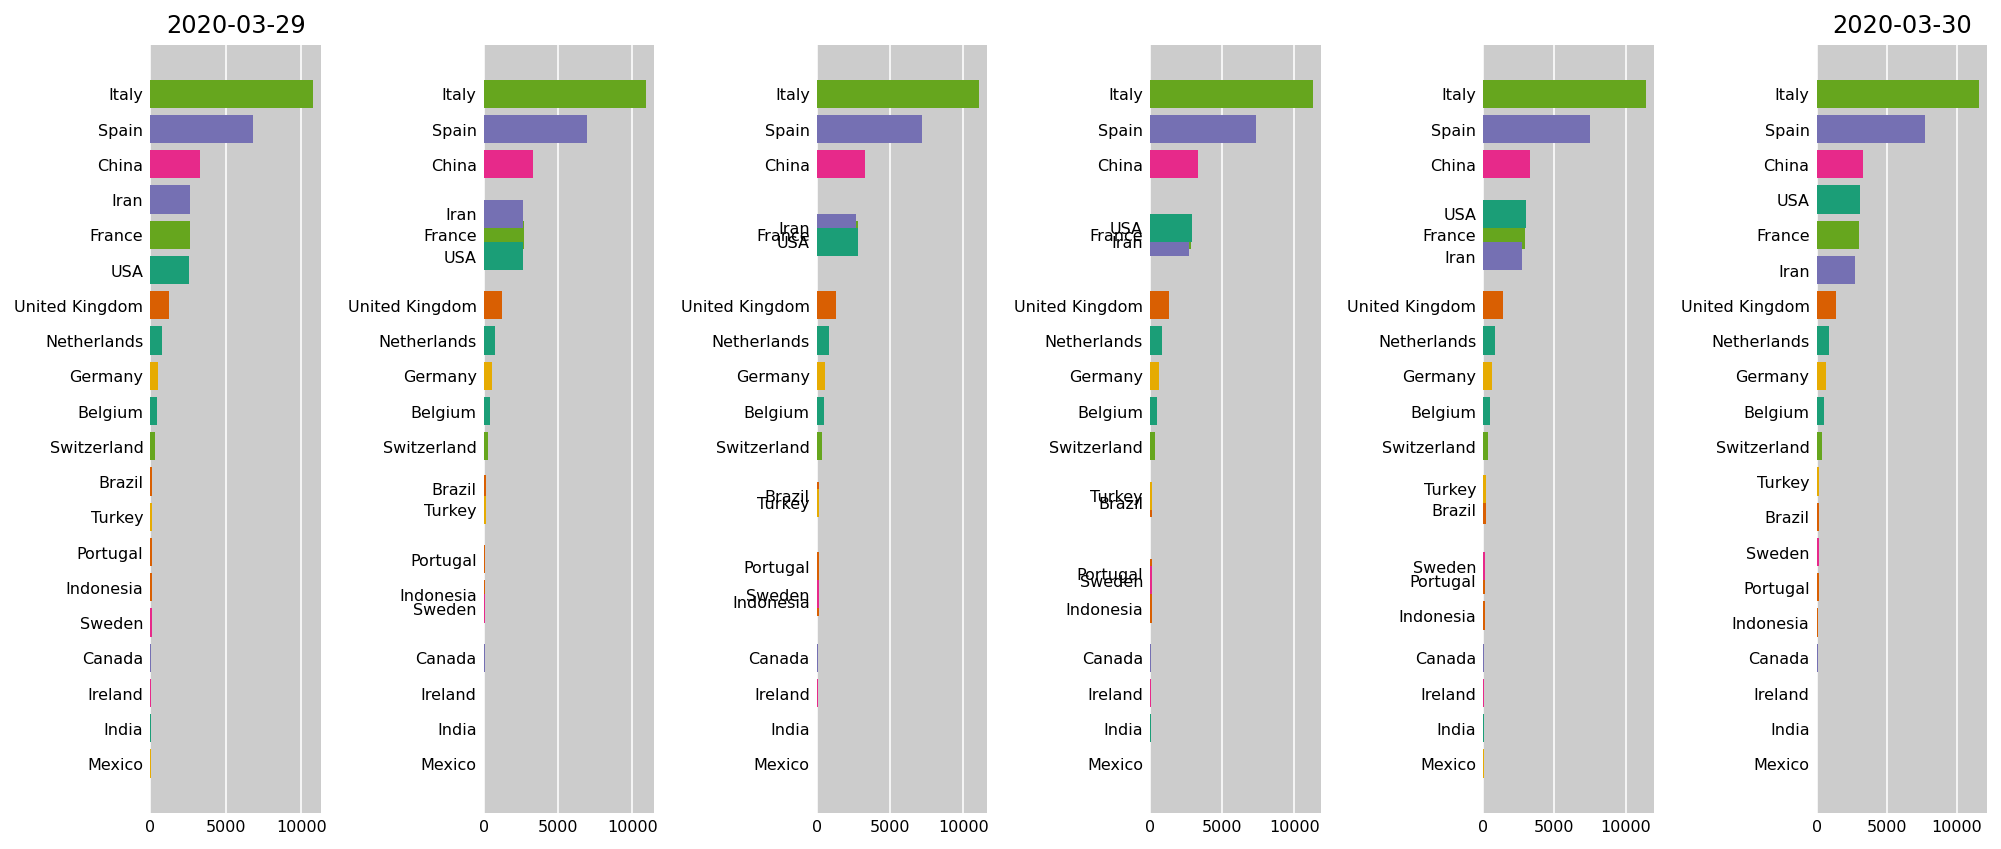

In [16]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(14, 6), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30');

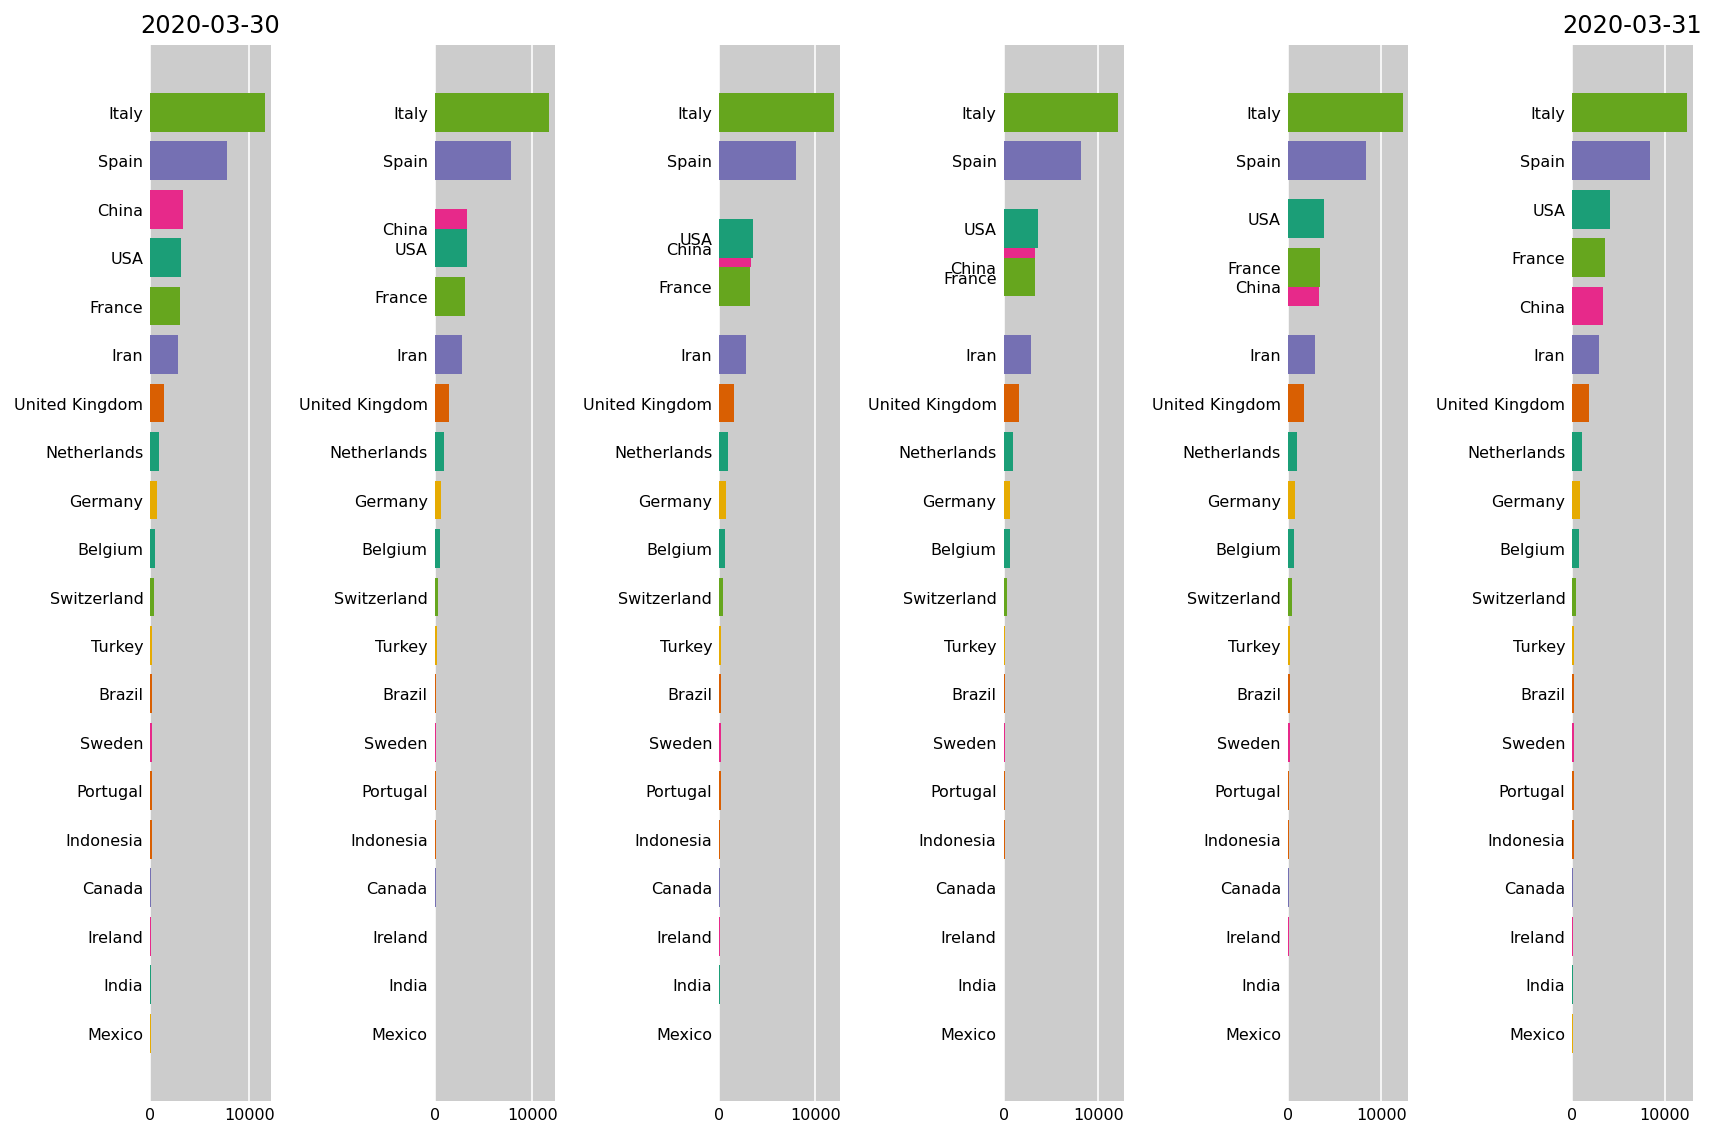

In [17]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 8), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-30')
ax_array[-1].set_title('2020-03-31');

In [18]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2722.8,2.0,NaN,NaN,NaN,20.4,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2728.6,2.0,NaN,NaN,NaN,21.8,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2734.4,2.0,NaN,NaN,NaN,23.2,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,2740.2,2.0,NaN,NaN,NaN,24.6,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_rank_expanded.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [21]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [22]:
anim.save('covid19.mp4')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [24]:
!pip install bar_chart_race 

     |████████████████████████████████| 163kB 9.7MB/s 


In [27]:
import bar_chart_race as bcr
html = bcr.bar_chart_race(df, figsize=(8, 4.5), title='COVID-19 Deaths by Country')
HTML(html)

TypeError: ignored

In [26]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-30,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-31,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [28]:
df2.asfreq('6h')

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-03-29 00:00:00,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31 00:00:00,705.0,201.0,101.0,3309.0,3532.0,775.0,35.0,136.0,2898.0,71.0,12428.0,28.0,1040.0,160.0,8464.0,180.0,433.0,214.0,4039.0,1793.0


In [ ]:
num_periods = (len(df2) - 1) * 5 + 1
dr = pd.date_range(start='2020-03-29', end='2020-03-31', 
                   periods=num_periods)
dr
DatetimeIndex(['2020-03-29 00:00:00', '2020-03-29 04:48:00',
               '2020-03-29 09:36:00', '2020-03-29 14:24:00',
               '2020-03-29 19:12:00', '2020-03-30 00:00:00',
               '2020-03-30 04:48:00', '2020-03-30 09:36:00',
               '2020-03-30 14:24:00', '2020-03-30 19:12:00',
               '2020-03-31 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [30]:
df2.reindex(dr)

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
2020-03-29 00:00:00,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29 04:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 09:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 14:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0
2020-03-30 04:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 09:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 14:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30 19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
num_periods = (len(df) - 1) * 5 + 1
dr = pd.date_range(start=df.index[0], end=df.index[-1], periods=num_periods)
df_expanded = df.reindex(dr)
df_rank_expanded = df_expanded.rank(axis=1).interpolate()
df_expanded = df_expanded.interpolate()
df_expanded.iloc[160:166]

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
2020-03-29 00:00:00,431.0,136.0,64.0,3304.0,2611.0,533.0,27.0,114.0,2640.0,46.0,10779.0,16.0,772.0,119.0,6803.0,110.0,300.0,131.0,2566.0,1231.0
2020-03-29 04:48:00,447.4,140.6,67.2,3304.8,2694.8,555.4,28.0,115.6,2663.4,47.6,10941.4,16.8,790.6,123.2,6985.6,117.2,311.8,138.4,2675.2,1267.0
2020-03-29 09:36:00,463.8,145.2,70.4,3305.6,2778.6,577.8,29.0,117.2,2686.8,49.2,11103.8,17.6,809.2,127.4,7168.2,124.4,323.6,145.8,2784.4,1303.0
2020-03-29 14:24:00,480.2,149.8,73.6,3306.4,2862.4,600.2,30.0,118.8,2710.2,50.8,11266.2,18.4,827.8,131.6,7350.8,131.6,335.4,153.2,2893.6,1339.0
2020-03-29 19:12:00,496.6,154.4,76.8,3307.2,2946.2,622.6,31.0,120.4,2733.6,52.4,11428.6,19.2,846.4,135.8,7533.4,138.8,347.2,160.6,3002.8,1375.0
2020-03-30 00:00:00,513.0,159.0,80.0,3308.0,3030.0,645.0,32.0,122.0,2757.0,54.0,11591.0,20.0,865.0,140.0,7716.0,146.0,359.0,168.0,3112.0,1411.0


In [32]:
df_rank_expanded.iloc[160:166]

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
2020-03-29 00:00:00,11.0,9.0,4.0,18.0,16.0,12.0,2.0,6.0,17.0,3.0,20.0,1.0,13.0,7.0,19.0,5.0,10.0,8.0,15.0,14.0
2020-03-29 04:48:00,11.0,8.8,4.0,18.0,16.0,12.0,2.0,5.8,16.6,3.0,20.0,1.0,13.0,6.8,19.0,5.4,10.0,8.2,15.4,14.0
2020-03-29 09:36:00,11.0,8.6,4.0,18.0,16.0,12.0,2.0,5.6,16.2,3.0,20.0,1.0,13.0,6.6,19.0,5.8,10.0,8.4,15.8,14.0
2020-03-29 14:24:00,11.0,8.4,4.0,18.0,16.0,12.0,2.0,5.4,15.8,3.0,20.0,1.0,13.0,6.4,19.0,6.2,10.0,8.6,16.2,14.0
2020-03-29 19:12:00,11.0,8.2,4.0,18.0,16.0,12.0,2.0,5.2,15.4,3.0,20.0,1.0,13.0,6.2,19.0,6.6,10.0,8.8,16.6,14.0
2020-03-30 00:00:00,11.0,8.0,4.0,18.0,16.0,12.0,2.0,5.0,15.0,3.0,20.0,1.0,13.0,6.0,19.0,7.0,10.0,9.0,17.0,14.0


In [33]:
df_one = df.reset_index() \
           .reindex([i / 5 for i in range(len(df) * 5 - 4)]) \
           .reset_index(drop=True) \
           .pipe(lambda x: pd.concat(
                                [x, x.iloc[:, 1:].rank(axis=1)], 
                                axis=1, keys=['values', 'ranks'])) \
           .interpolate() \
           .fillna(method='ffill') \
           .set_index(('values', 'date')) \
           .rename_axis(index='date')
df_one.head()

values                        ...       ranks                          
           Belgium Brazil Canada   China  ... Switzerland Turkey USA United Kingdom
date                                      ...                                      
2020-02-26     NaN    NaN    NaN  2717.0  ...         NaN    NaN NaN            NaN
2020-02-26     NaN    NaN    NaN  2722.8  ...         NaN    NaN NaN            NaN
2020-02-26     NaN    NaN    NaN  2728.6  ...         NaN    NaN NaN            NaN
2020-02-26     NaN    NaN    NaN  2734.4  ...         NaN    NaN NaN            NaN
2020-02-26     NaN    NaN    NaN  2740.2  ...         NaN    NaN NaN            NaN

[5 rows x 40 columns]